In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
len(X_train)

60000

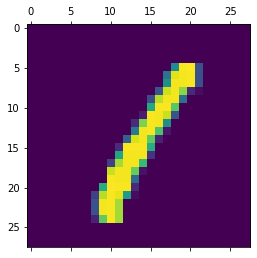

In [10]:
plt.matshow(X_train[3])

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

In [19]:
X_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 828us/step - loss: 0.4759 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 1s 781us/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9253


In [22]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 3s 778us/step - loss: 0.2697 - accuracy: 0.9247


[0.26974138617515564, 0.9247000217437744]

In [23]:
y_predicted = model.predict(X_test_flat)

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    6,    9,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   8,   11,  910,   20,    6,    5,   14,   11,   42,    5],
       [   3,    1,   15,  928,    1,   22,    3,    9,   19,    9],
       [   1,    3,    3,    2,  909,    0,   16,    4,    8,   36],
       [   7,    3,    2,   35,    9,  775,   21,    4,   29,    7],
       [   8,    3,    3,    1,    7,   10,  923,    2,    1,    0],
       [   1,   10,   19,   10,    8,    1,    0,  936,    2,   41],
       [   7,   14,    6,   22,   10,   23,   10,    9,  862,   11],
       [  10,    8,    1,   10,   30,    5,    0,   13,    7,  925]])>

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


Text(69.0, 0.5, 'Truth')

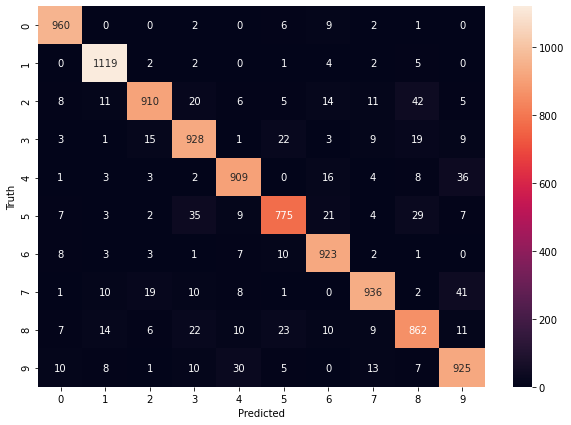

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding Hidden layer

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2745 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1240 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0876 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0536 - accuracy: 0.9842


In [28]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 957us/step - loss: 0.0759 - accuracy: 0.9771


[0.07586091011762619, 0.9771000146865845]

In [30]:
y_predicted = model.predict(X_test_flat)

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truth')

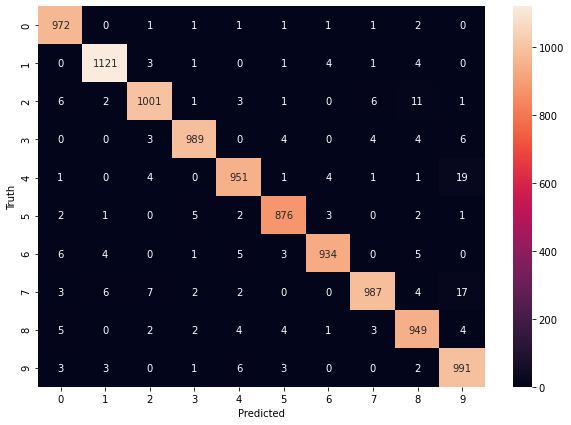

In [32]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')